In [1]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Load Data
images = np.load('data/images.npy')
labels = np.load('data/labels.npy')

#Shuffle
indices = np.arange(images.shape[0])
np.random.shuffle(indices)
images = images[indices]
labels = labels[indices]

# input image dimensions
img_rows, img_cols = images.shape[1], images.shape[2]

if K.image_data_format() == 'channels_first':
    images = images.reshape(images.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    images = images.reshape(images.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

images = images.astype('float32')
images /= 255

#80/10/10% splits for training/validation and test sets
train_images, temp_images, train_labels, temp_labels = train_test_split(images, labels, test_size=0.2)
val_images, test_images, val_labels, test_labels = train_test_split(temp_images, temp_labels, test_size=0.5)

In [3]:
num_classes = 24
def re_category(labels, num_classes):

    minutes = labels[0]*60+labels[1]
    relabels = int(minutes//(12*60/num_classes))
    return relabels

train_labels2 = np.array([re_category(h, num_classes) for h in train_labels])
val_labels2= np.array([re_category(h, num_classes) for h in val_labels])
test_labels2 = np.array([re_category(h, num_classes) for h in test_labels])

/Users/chenyiru/miniconda3/envs/IDL/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-13 22:14:58.407625: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2024-11-13 22:14:58.407649: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-11-13 22:14:58.407666: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-11-13 22:14:58.407680: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-13 22:14:58.407689: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_

Epoch 1/30


2024-11-13 22:14:59.368456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


225/225 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.0429 - loss: 3.1804 - val_accuracy: 0.0422 - val_loss: 3.1781
Epoch 2/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - accuracy: 0.0432 - loss: 3.1781 - val_accuracy: 0.0361 - val_loss: 3.1781
Epoch 3/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - accuracy: 0.0455 - loss: 3.1778 - val_accuracy: 0.0572 - val_loss: 3.1736
Epoch 4/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.0613 - loss: 3.1186 - val_accuracy: 0.1583 - val_loss: 2.6874
Epoch 5/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - accuracy: 0.1488 - loss: 2.6683 - val_accuracy: 0.2311 - val_loss: 2.3437
Epoch 6/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - accuracy: 0.2170 - loss: 2.3973 - val_accuracy: 0.2844 - val_loss: 2.1341
Epoch 7/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.2746 - loss: 2.1693 - val_accuracy: 0.3506 - val_loss: 1.9006
Epoch 8/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.3146 - loss: 1.9877 - val_accurac

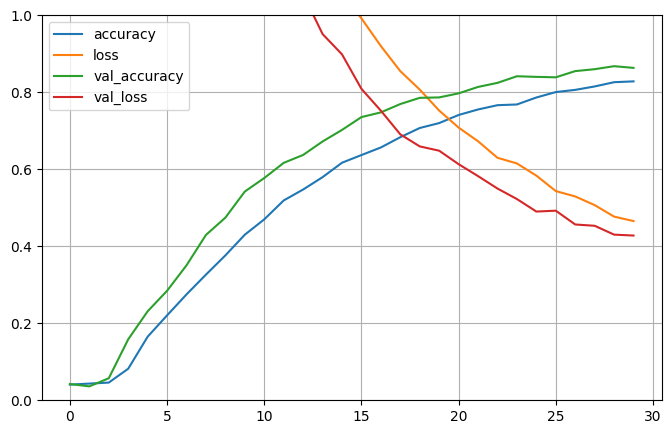

Validation loss: 0.42789334058761597
Validation accuracy: 0.8633333444595337
Test loss: 0.4356205463409424
Test accuracy: 0.8761110901832581


In [4]:
batch_size = 64
epochs = 30
#Build Model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels2,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(val_images, val_labels2))
df = pd.DataFrame(history.history)
df.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
score = model.evaluate(val_images, val_labels2, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
score_final = model.evaluate(test_images, test_labels2, verbose=0)
print('Test loss:', score_final[0])
print('Test accuracy:', score_final[1])